# <span style="color:#ffffff; font-size: 1%;">[1] 🌧️ Introduction</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[1] 🌧️⚡ Introduction</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

Welcome to my notebook for the Rainfall Prediction for "Gujarat, India". 


📡 **Data Source:** [NASA POWER API](https://power.larc.nasa.gov/)  
📆 **Timeline:** Jan 2011 – Dec 2024 (**5114 days**)  
📍 **Coordinates:** Gujarat, India (Lat: 23.223, Lon: 72.650)


☔🏆 This Notebook provides a great opportunity to work with tabular data, experiment with feature engineering, Time series, and refine machine learning models to predict the probability of rainfall.

In this notebook, we will:

1. **Fetch Data using API** – rainfall data of lat(23.223), lon(72.650) __"Gujarat, India" From **NASA**.
2. **Perform Exploratory Data Analysis (EDA) 📊** – Analyze trends, visualize distributions, and handle missing values.
3. **Build Machine Learning Model 🤖** – Train and evaluate classification model for rainfall prediction.
4. **Optimize Hyperparameters ⚙️** – Fine-tune models for improved accuracy.

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.1] 🌧️ Problem Statement</span></b>

Predict the **probability of rainfall** for each entry in the **test dataset** by leveraging **historical weather patterns** from the training data. The objective is to build a **robust classification model** that accurately estimates the **`rainfall` column values** for unseen data.

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.2] 🚀 Goal </span></b>

Our goal is to **predict the 'rainfall' target feature values** (binary: 0 = no rain, 1 = rain) for each day of the year and **maximize AUC-ROC** by selecting meaningful features, experimenting with different classification models, and fine-tuning hyperparameters to improve predictive performance. 🌧️📈

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.3] 🗂 Dataset Description</span></b>

### 📊 Dataset Description: NASA POWER Weather Data for Gujarat (2011–2024)

This dataset contains daily weather observations for **Gujarat, India** (latitude: `23.223`, longitude: `72.650`) retrieved via the **NASA POWER API** for the period **January 1, 2011 to December 31, 2024**.

The API returns daily climate variables used for agro-climatic analysis. The data has been preprocessed into a clean format suitable for exploratory data analysis and predictive modeling.

( The phrase "at 2 meters" refers to the standard height above ground level where weather measurements are taken.)

#### 📌 Features:
- **id**: Unique identifier for each day  
- **day**: Date in `YYYYMMDD` format  
- **PRECTOTCORR**: Precipitation (mm/day) – bias-corrected total precipitation  
- **temparature**: Mean air temperature at 2 meters (°C)  
- **maxtemp**: Maximum air temperature at 2 meters (°C)  
- **mintemp**: Minimum air temperature at 2 meters (°C)  
- **humidity**: Relative humidity at 2 meters (%)  
- **windspeed**: Wind speed at 2 meters (m/s)  
- **winddirection**: Wind direction at 2 meters (degrees)  
- **pressure**: Surface pressure (kPa)  
- **rain_category**: Categorized rainfall (e.g., Dry, Light, Moderate, etc.)  
- **rain(yes/no)**: Binary label indicating rainfall occurrence (`1` = rain, `0` = no rain)  
- **date**: Parsed datetime object from `day` for time-based analysis

This dataset is ideal for tasks such as rainfall prediction, time series analysis, and climate trend visualization.


<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.4] 📏 Evaluation Metric – AUC-ROC</span></b>

#### **1️⃣ AUC (Area Under the Curve)**
- Measures how well a model differentiates between **positive** and **negative** classes.
- The AUC score is computed by summing up the contributions of each segment in the **ROC Curve**.
- A **higher AUC** indicates a better model.

⚡ **AUC Score (0 to 1 Scale):**  
   - **AUC = 1.0** → Perfect classification.  
   - **AUC > 0.85** → Excellent model.  
   - **AUC = 0.50** → Random guessing.  
   - **AUC < 0.50** → Worse than random.

# <span style="color:#ffffff; font-size: 1%;">[2] 🔍 Dataset Overview</span>
### <span style="color:#ffffff; font-size: 1%;">Dataset Overview</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[2] 📊🔍 Dataset Overview</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [2.1] Loading the Datasets (API) & Libraries</span></b>

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Fetching Data from POWER NASA API

# Set your coordinates (example: Gujarat, India)
lat = 23.223
lon = 72.650

# Define date range
start_date = "20110101"
end_date = "20241231"

# Define desired parameters
params = "PRECTOTCORR,T2M,T2M_MAX,T2M_MIN,RH2M,WS2M,WD2M,PS"

# API URL
url = (
    "https://power.larc.nasa.gov/api/temporal/daily/point"
    f"?start={start_date}&end={end_date}"
    f"&latitude={lat}&longitude={lon}"
    f"&parameters={params}"
    "&community=ag&format=JSON"
)

# Send request
response = requests.get(url)
data = response.json()

# Extract daily data
records = data["properties"]["parameter"]

# Convert to DataFrame
df = pd.DataFrame(records)
df = df.reset_index()
df.rename(columns={"index": "day"}, inplace=True)

# Preview
display(df.head())
display(df.info())
display(df.describe(include='all'))

day  PRECTOTCORR    T2M  T2M_MAX  T2M_MIN   RH2M  WS2M  WD2M      PS
0  20110101          0.0  15.18    25.85     7.26  44.85  2.38  47.9  100.85
1  20110102          0.0  15.04    25.84     6.78  44.83  2.13  46.2  100.81
2  20110103          0.0  15.67    26.52     7.38  44.01  2.59  54.8  100.88
3  20110104          0.0  16.51    27.19     8.79  46.13  2.49  41.4  100.89
4  20110105          0.0  16.53    27.25     8.78  45.06  1.96  25.8  100.85

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5114 entries, 0 to 5113
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          5114 non-null   object 
 1   PRECTOTCORR  5114 non-null   float64
 2   T2M          5114 non-null   float64
 3   T2M_MAX      5114 non-null   float64
 4   T2M_MIN      5114 non-null   float64
 5   RH2M         5114 non-null   float64
 6   WS2M         5114 non-null   float64
 7   WD2M         5114 non-null   float64
 8   PS           5114 non-null   float64
dtypes: float64(8), object(1)
memory usage: 359.7+ KB


None

day  PRECTOTCORR          T2M      T2M_MAX      T2M_MIN  \
count       5114  5114.000000  5114.000000  5114.000000  5114.000000   
unique      5114          NaN          NaN          NaN          NaN   
top     20110101          NaN          NaN          NaN          NaN   
freq           1          NaN          NaN          NaN          NaN   
mean         NaN     2.142917    27.451177    34.803727    20.956713   
std          NaN     7.736039     5.217217     5.120040     5.931894   
min          NaN     0.000000    13.880000    20.400000     5.380000   
25%          NaN     0.000000    23.580000    31.080000    15.960000   
50%          NaN     0.000000    27.690000    33.510000    22.625000   
75%          NaN     0.210000    31.340000    38.557500    25.697500   
max          NaN   163.270000    39.110000    48.580000    32.220000   

               RH2M         WS2M         WD2M           PS  
count   5114.000000  5114.000000  5114.000000  5114.000000  
unique          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN  
mean      50.303643     2.406085   196.948397   100.299077  
std       23.138317     1.095579   105.527410     0.546864  
min        4.190000     0.370000     0.000000    98.740000  
25%       30.822500     1.620000    74.825000    99.850000  
50%       46.150000     2.160000   237.600000   100.330000  
75%       71.727500     2.980000   277.575000   100.770000  
max       94.380000     8.840000   359.900000   101.610000

In [3]:
# Rename columns for clarity
df.columns = [
    "day",           # Date in YYYYMMDD format
    "PRECTOTCORR",   # Precipitation (mm/day)
    "temperature",   # Mean air temperature at 2 meters (°C)
    "maxtemp",       # Maximum temperature at 2 meters (°C)
    "mintemp",       # Minimum temperature at 2 meters (°C)
    "humidity",      # Relative humidity at 2 meters (%)
    "windspeed",     # Wind speed at 2 meters (m/s)
    "winddirection", # Wind direction at 2 meters (degrees)
    "pressure"       # Surface pressure (kPa)
]
# Add a unique ID column & Move 'id' to the front of the DataFrame
df["id"] = range(1, len(df) + 1)
df = df[["id"] + df.columns[:-1].tolist()] 

# Make a clean copy of the DataFrame
df=df.copy()

# Define rainfall intensity bins (in mm) and corresponding labels
bins = [-0.1, 0, 2.5, 7.5, 35.0, 70.0, float('inf')]
labels = ['Dry day', 'Light rain', 'Moderate rain', 'Heavy rain', 'Very heavy rain', 'Extreme rain']

# Categorize rainfall values into rain intensity levels
df.loc[:, 'rain_category'] = pd.cut(df['PRECTOTCORR'], bins=bins, labels=labels)
df.loc[:,'rain(yes/no)'] = (df['PRECTOTCORR'] != 0).astype('int') # binary rain label: 1 = rain occurred, 0 = no rain
df['rain(yes/no)']=df['rain(yes/no)'].astype(int)

# Convert 'day' string to proper datetime format
df['date'] = pd.to_datetime(df['day'], format='%Y%m%d')

In [4]:
# Splitting Data for training and testing train = '2011 to 2020', test = '2021 to 2024'

train_data = df[df['date'] <= '2020-12-31']
test_data = df[df['date'] > '2020-12-31']

# Extract day of year from train_data
train_data['day_of_year'] = train_data['date'].dt.dayofyear
train_data.drop(columns='date',inplace=True)

# Extract day of year from test_data
test_data['day_of_year'] = test_data['date'].dt.dayofyear
test_data.drop(columns='date',inplace=True)

# Remove target Features from test_data
rmv2 = ['PRECTOTCORR', 'rain_category', 'rain(yes/no)']
test_data.drop(columns=rmv2, inplace=True)

print("Training Data shape: ", train_data.shape)
print("Test Data shape: " , test_data.shape)

Training Data shape:  (3653, 13)
Test Data shape:  (1461, 10)


# <span style="color:#ffffff; font-size: 1%;">[3] 💡 Exploratory Data Analysis (EDA)</span>
### <span style="color:#ffffff; font-size: 1%;">EDA</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[3] 📈💡EDA</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

EDA is like peeling back the layers of a dataset to uncover hidden trends, spot inconsistencies, and extract valuable insights. Before we dive into modeling, it's crucial to **explore, visualize, and preprocess** our data to set a solid foundation for predictions.  

### 🏗️ What Our EDA Will Cover:  

1️⃣ **Understanding Numerical Features** 📊  
   - We'll **examine distributions** using histograms to see how each feature behaves.  
   - **Boxplots** will help us identify potential outliers and assess data spread.  

2️⃣ **Exploring Categorical Variables** 🔠  
   - Using **countplots**, we'll analyze category frequencies and detect imbalances.  
   - **Pie charts** will give us a quick view of category proportions within the dataset.  

3️⃣ **Analyzing the Target Variable** 🎯  
   - Since the target variable is binary (rain or no rain), we'll **check its distribution** to understand class balance.  
   - **Bar charts and KDE plots** will help visualize its relationship with other features.  

In [5]:
numerical_variables = ['pressure', 'maxtemp', 'temperature', 'mintemp', 'humidity', 'windspeed']
target_variable = 'rain(yes/no)' 
categorical_variables = ['winddirection']

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.1] Numerical Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

In [6]:
# Analysis of all NUMERICAL features

# Define a custom color palette
custom_palette = ['#3498db', '#e74c3c']

# Add 'Dataset' column to distinguish between train and test data

train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'


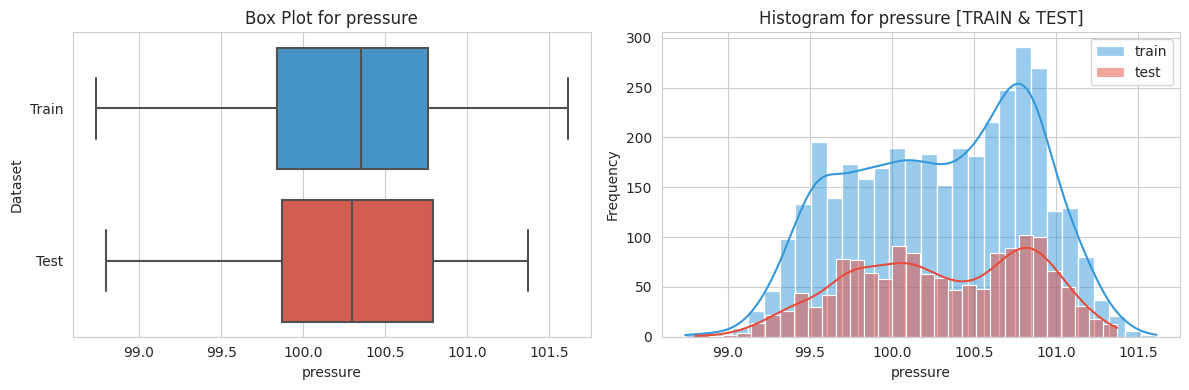

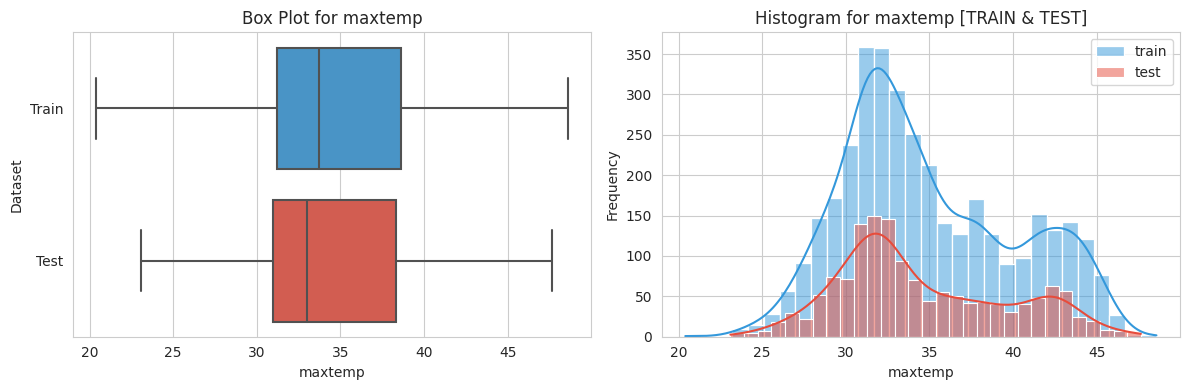

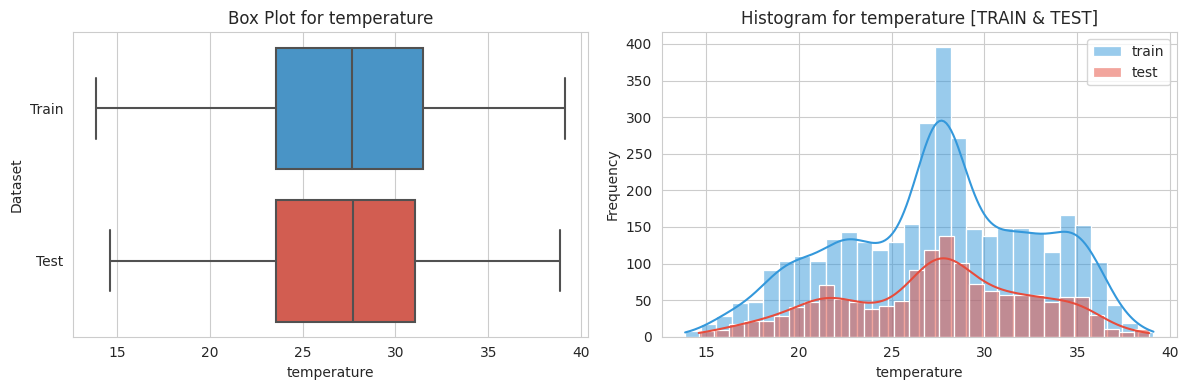

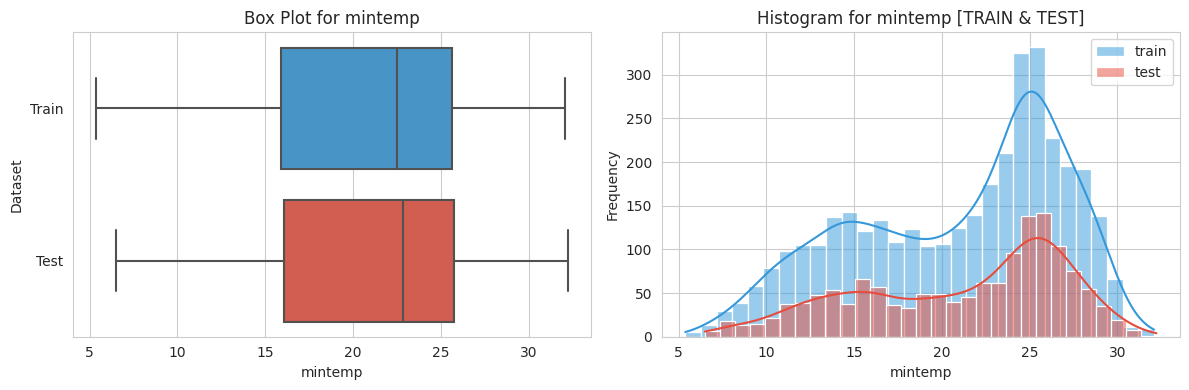

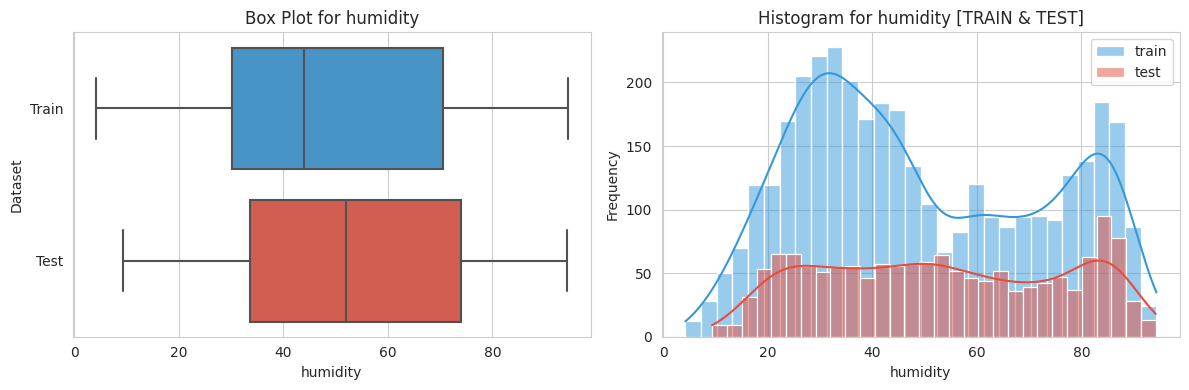

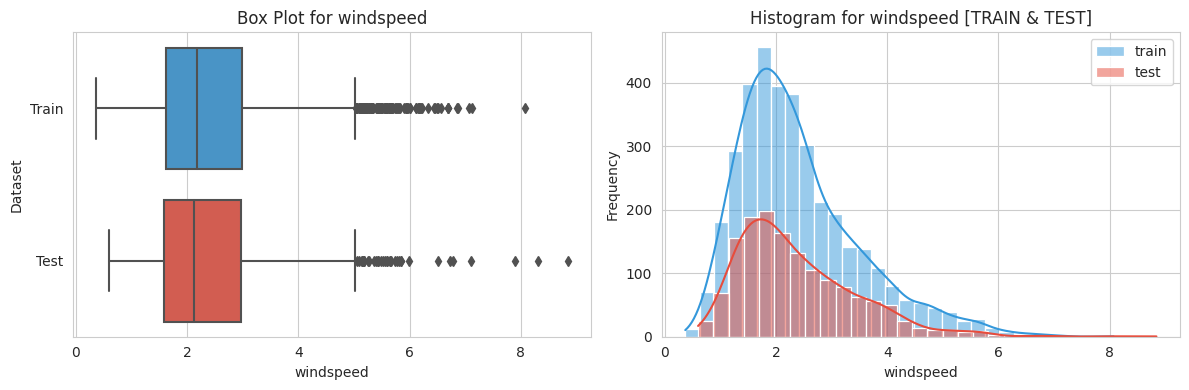

In [7]:
# function to create and display a row of plots for a single variable

def create_variable_plots(variable):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1,2, figsize=(12,4))

    #box plot
    plt.subplot(1,2,1)
    sns.boxplot(data=pd.concat([train_data,test_data]),x = variable, y = 'Dataset', palette=custom_palette)
    plt.xlabel(variable)
    plt.title(f"Box Plot for {variable}")
                

    #histograms
    plt.subplot(1,2,2)
    sns.histplot(data=train_data, x=variable, color=custom_palette[0], kde=True, bins=30, label='train')
    sns.histplot(data=test_data, x=variable, color=custom_palette[1], kde=True, bins=30, label='test')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"Histogram for {variable} [TRAIN & TEST]")
    plt.legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

# Perform univariate analysis for each variable
for variable in numerical_variables:
    create_variable_plots(variable)


# Drop the 'Dataset' column after analysis
train_data.drop('Dataset', axis=1, inplace=True)
test_data.drop('Dataset', axis=1, inplace=True)


<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.2] Categorical Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

#### **📌 Wind Rose Plot**
As we have values that **involve direction**, a different kind of plot—called a **Wind Rose**—is more suitable for analyzing categorical values like **wind direction**. Unlike standard bar charts or histograms, a **polar plot (wind rose)** represents the frequency of wind directions in a circular format, maintaining the **natural cyclic nature** of directional data (0°–360°). This allows us to:
- **Preserve directional patterns** (N, NE, E, etc.).
- **Easily identify dominant wind directions**.
- **Understand wind distribution more intuitively** than a traditional bar chart.

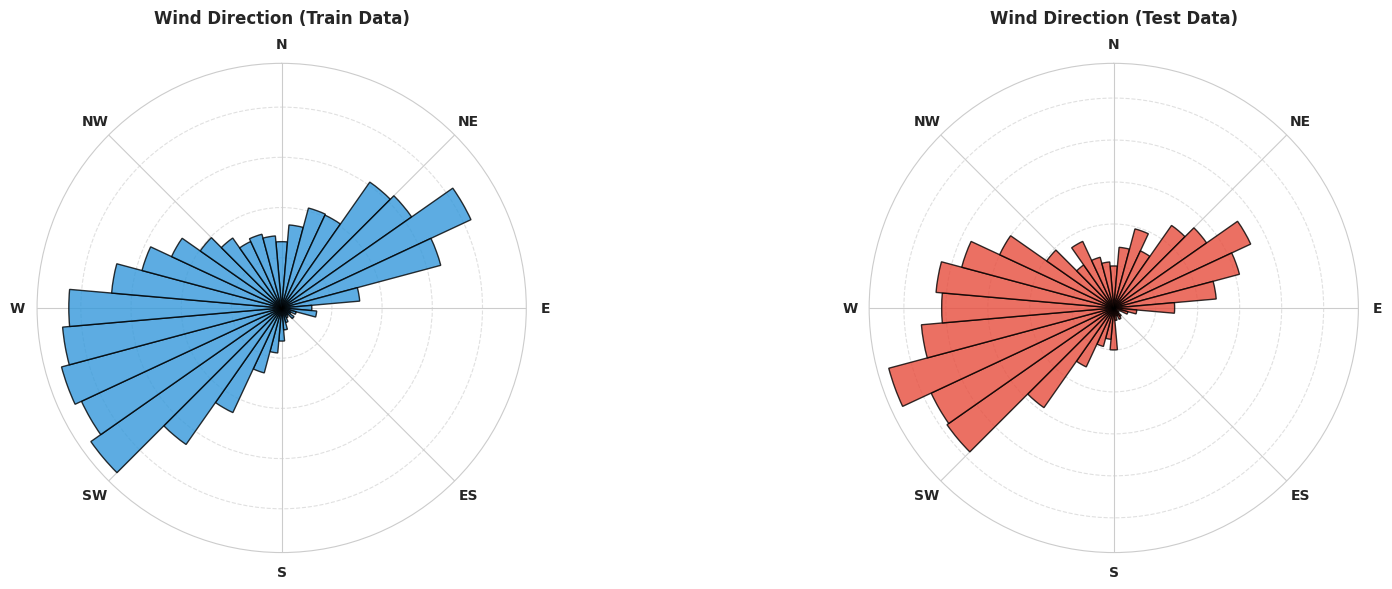

In [8]:
# Function to create Wind Rose plot in a subplot
def create_wind_rose(ax, data, dataset_name, color):

    #convert wind directions to radians
    wind_direction_radians = np.radians(data['winddirection'].dropna())

    #create histogram bins (every 10°)
    bins = np.linspace(0, 2*np.pi, 37) # 36 bins (every 10°)
    counts,bin_edges = np.histogram(wind_direction_radians, bins=bins)

    # plot on polar axis with improved style
    bars = ax.bar(bin_edges[:-1], counts, width=np.radians(10), color=color, edgecolor='black', alpha=0.8)

    # formating for professional appearance
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_xticks(np.radians(np.arange(0, 360, 45)))
    ax.set_xticklabels(['N','NE','E','ES','S','SW','W','NW'],fontsize=10,fontweight='bold')

    #add grids and label for better readability

    ax.yaxis.grid(True, linestyle="--", alpha=0.6)
    ax.set_yticklabels([]) #remove radian labels to avoid clutter
    ax.set_title(f"Wind Direction ({dataset_name})", fontsize=12, fontweight='bold', pad=10)

# Create a single row with three wind rose plots

fig, axes = plt.subplots(1, 2, figsize=(18,6), subplot_kw={'projection':'polar'})

# Generate wind rose plots for Train, Test, and Original datasets
create_wind_rose(axes[0], train_data, "Train Data", custom_palette[0])  # Blue
create_wind_rose(axes[1], test_data, "Test Data", custom_palette[1])    # Red

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.3] Target Feature Analysis <strong>(Univariate Analysis)</strong></span></b>

In [9]:
# color codes for Plots
pie_chart_palette = ['#33638d', '#28ae80']
countplot_color = '#5C67A3'

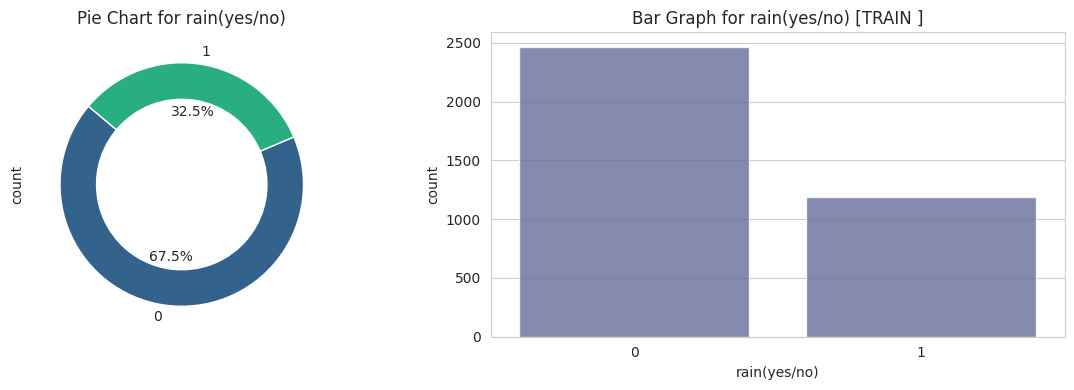

In [10]:
# Function to create and display a row of plots for a single target variable
def create_target_plots(variable):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(1,2, figsize=(12,4))

    
    #pie chart
    plt.subplot(1,2,1)
    train_data[variable].value_counts().plot.pie(
        autopct='%1.1f%%', colors = pie_chart_palette, wedgeprops=dict(width=0.3), startangle=140
    )
    plt.title(f"Pie Chart for {variable}")

    
    # Bar Graph
    plt.subplot(1,2,2)
    sns.countplot(
        data=train_data,
        x=variable,
        color= countplot_color,
        alpha=0.8
    )
    plt.xlabel(variable)
    plt.ylabel('count')
    plt.title(f"Bar Graph for {variable} [TRAIN ]")

    #Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

# Perform univariate analysis for target variable
create_target_plots(target_variable)

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.4] <strong> Bivariate Analysis </strong></span></b>

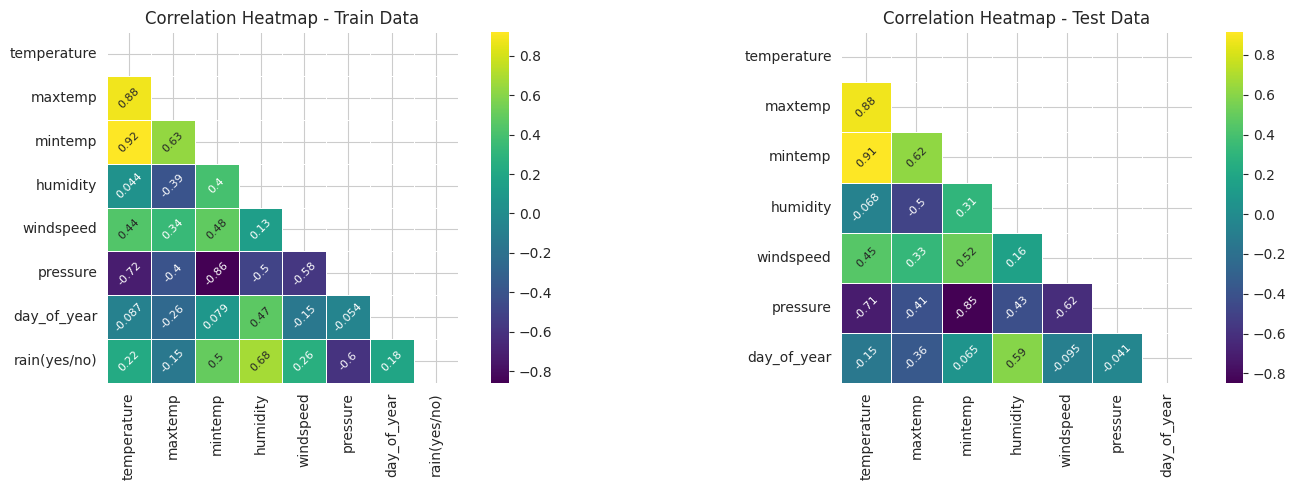

In [11]:
variables = [col for col in train_data.columns if col in numerical_variables]+['day_of_year']

# Adding variables to the existing list
test_variables = variables
train_variables = variables+ ['rain(yes/no)']

# Calculate correlation matrices for train_data and test_data
corr_train = train_data[train_variables].corr()
corr_test = test_data[test_variables].corr()

# Create masks for the upper triangle
mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
mask_test = np.triu(np.ones_like(corr_test, dtype=bool))

# Set the text size and rotation
annot_kws = {"size":8, "rotation":45}

# Generate heatmaps for train_data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax_train = sns.heatmap(
                        corr_train, mask=mask_train, cmap='viridis', annot=True, square=True,
                        linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws
                      )
plt.title('Correlation Heatmap - Train Data')

# Generate heatmaps for test_data
plt.subplot(1,2,2)
ax_test = sns.heatmap(
                      corr_test, mask=mask_test, cmap='viridis', annot=True, square=True,
                      linewidths=.5, xticklabels=1, yticklabels=1, annot_kws=annot_kws
                     )
plt.title('Correlation Heatmap - Test Data')

plt.tight_layout()
plt.show()

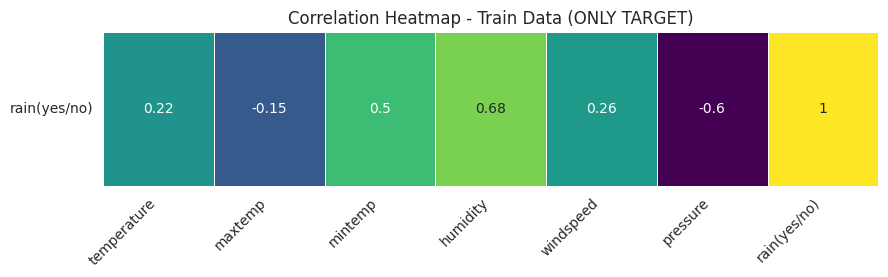

In [12]:
# Selecting numerical features + target variable
variables = [col for col in train_data.columns if col in numerical_variables]
train_variables = variables + ['rain(yes/no)']

# Compute correlation with 'rainfall' and transpose for horizontal display
corr_train = train_data[train_variables].corr()[['rain(yes/no)']].T  # Transpose for horizontal orientation

# Set the text size and rotation
annot_kws = {"size": 10}  # Increased size for better visibility

# Generate horizontal heatmap without color bar
plt.figure(figsize=(10, 2))  # Adjusted for a horizontal layout
ax_train = sns.heatmap(corr_train, cmap='viridis', annot=True, 
                      square=False, linewidths=0.5, annot_kws=annot_kws, 
                      cbar=False)  # **Removed color bar**

# Formatting
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title('Correlation Heatmap - Train Data (ONLY TARGET)')
plt.yticks(rotation=0)  # Keep y-labels horizontal

# Show plot
plt.show()

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.4] <strong>Time Series EDA:</strong>  Detecting Trends, Seasonality & Anomalies ⏰ </span></b>


- The **training dataset** spans **Ten consecutive years** 📆, 
- The **test dataset** represents a **Four consecutive yesrs** 

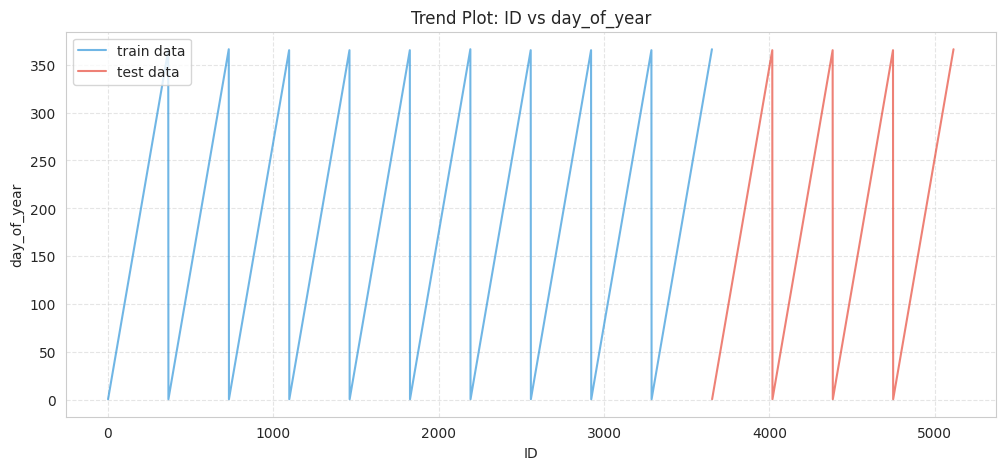

In [13]:
# Define colors for Train and Test data
train_color = '#3498db'  # Blue
test_color = '#e74c3c'   # Red

#create the plot
plt.figure(figsize=(12,5))

#plot train data
plt.plot(train_data['id'],train_data['day_of_year'],linestyle='-',color=train_color,label='train data',alpha=0.7)
plt.plot(test_data['id'],test_data['day_of_year'],linestyle='-',color=test_color,label='test data', alpha=0.7)

plt.xlabel('ID')
plt.ylabel('day_of_year')
plt.title('Trend Plot: ID vs day_of_year')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [14]:
# Define colors
train_color = '#3498db'  # Blue
test_color = '#e74c3c'   # Red
rainfall_colors = {0: '#f1c40f', 1: '#2980b9'}  # Dark Yellow (no rainfall), Blue (rainfall)

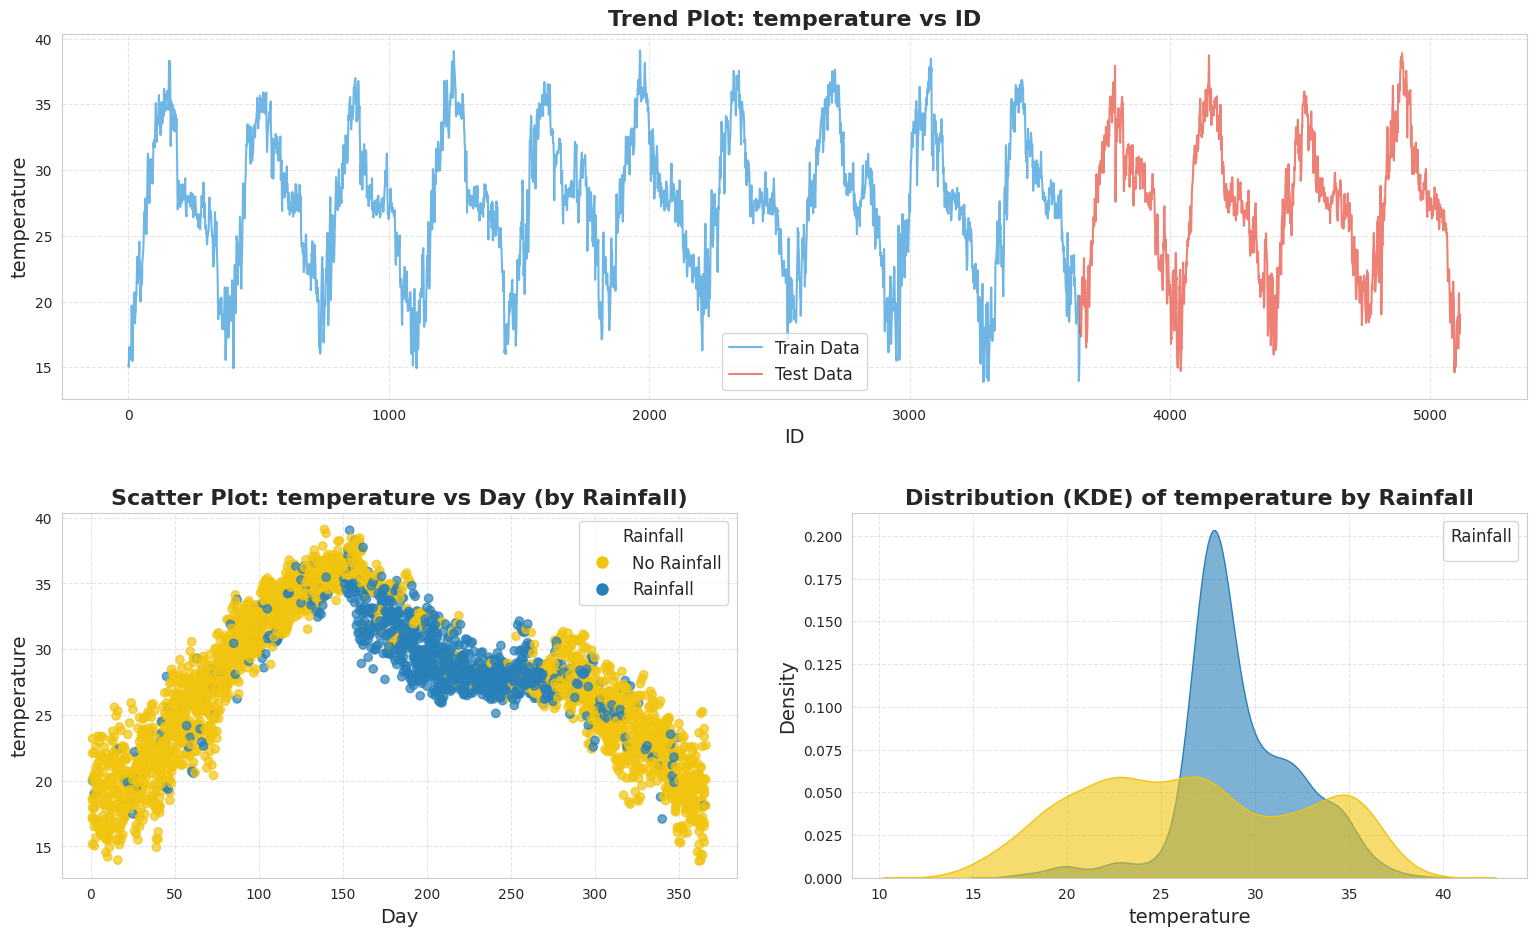

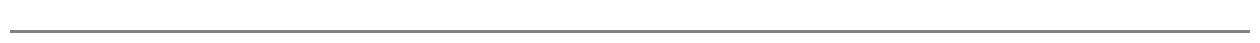

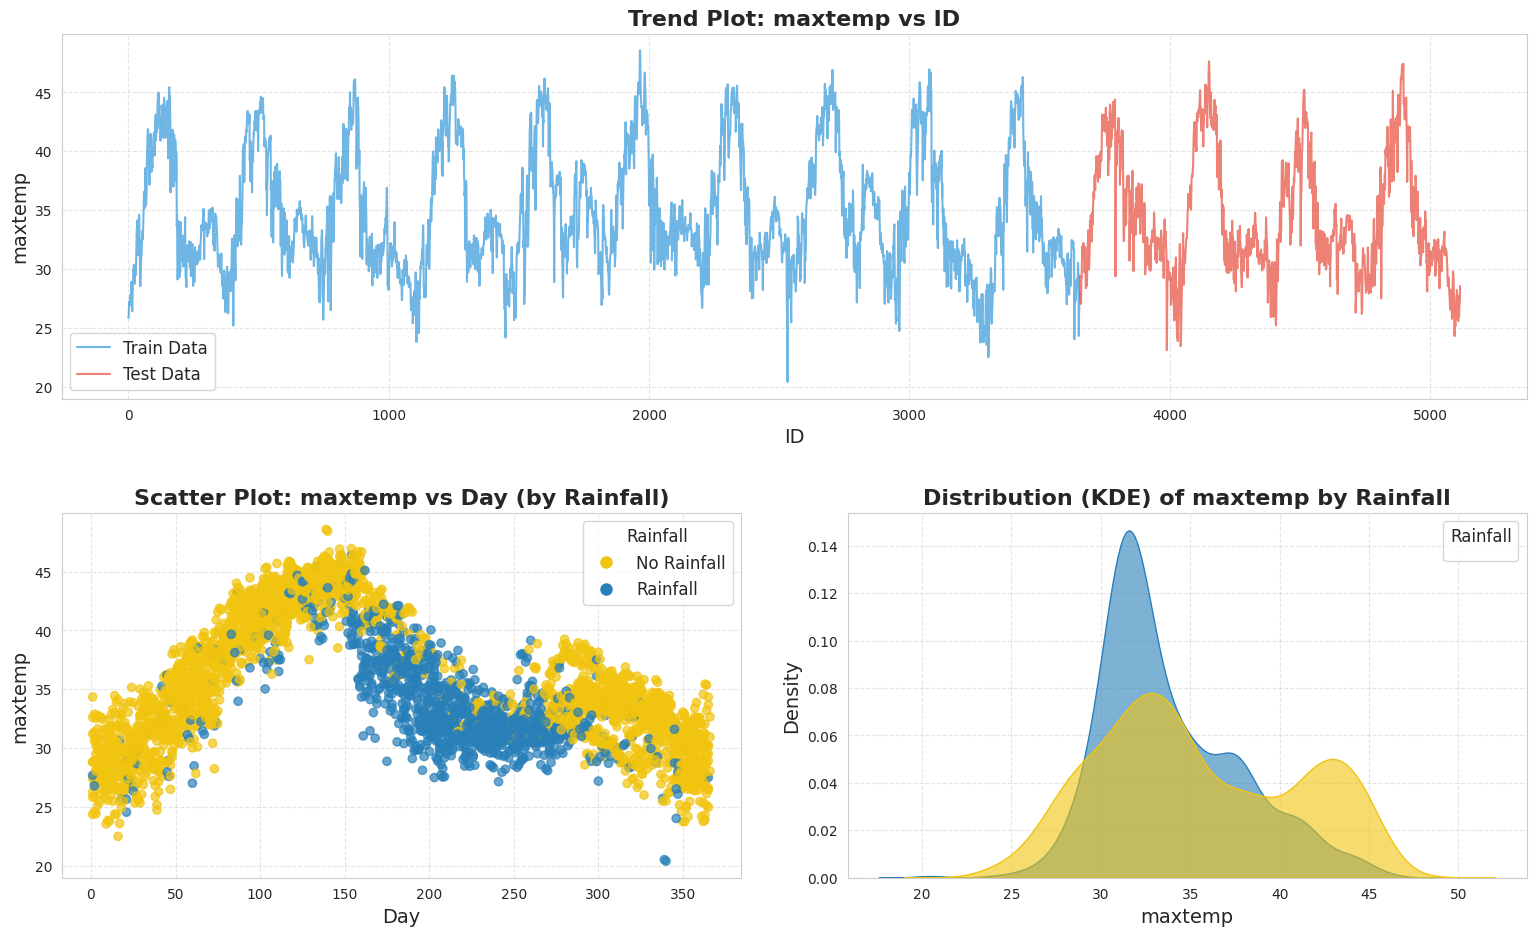

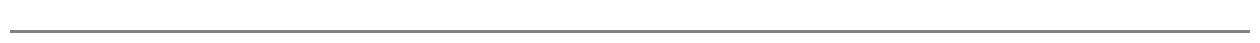

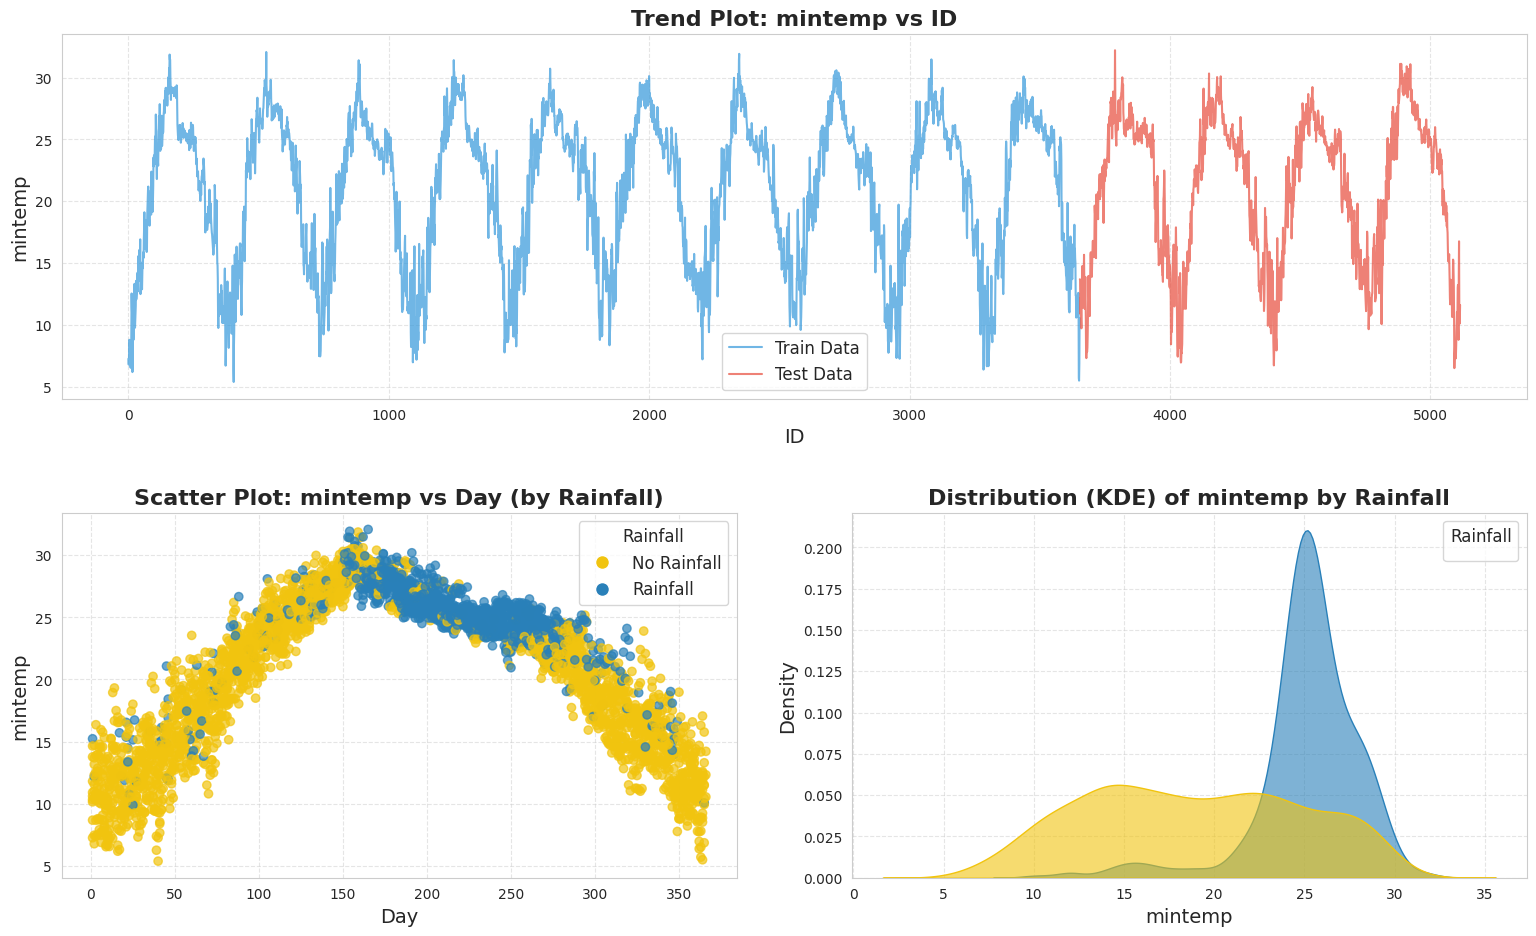

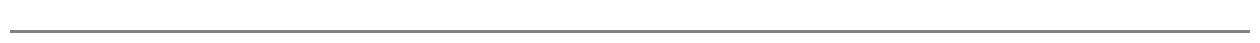

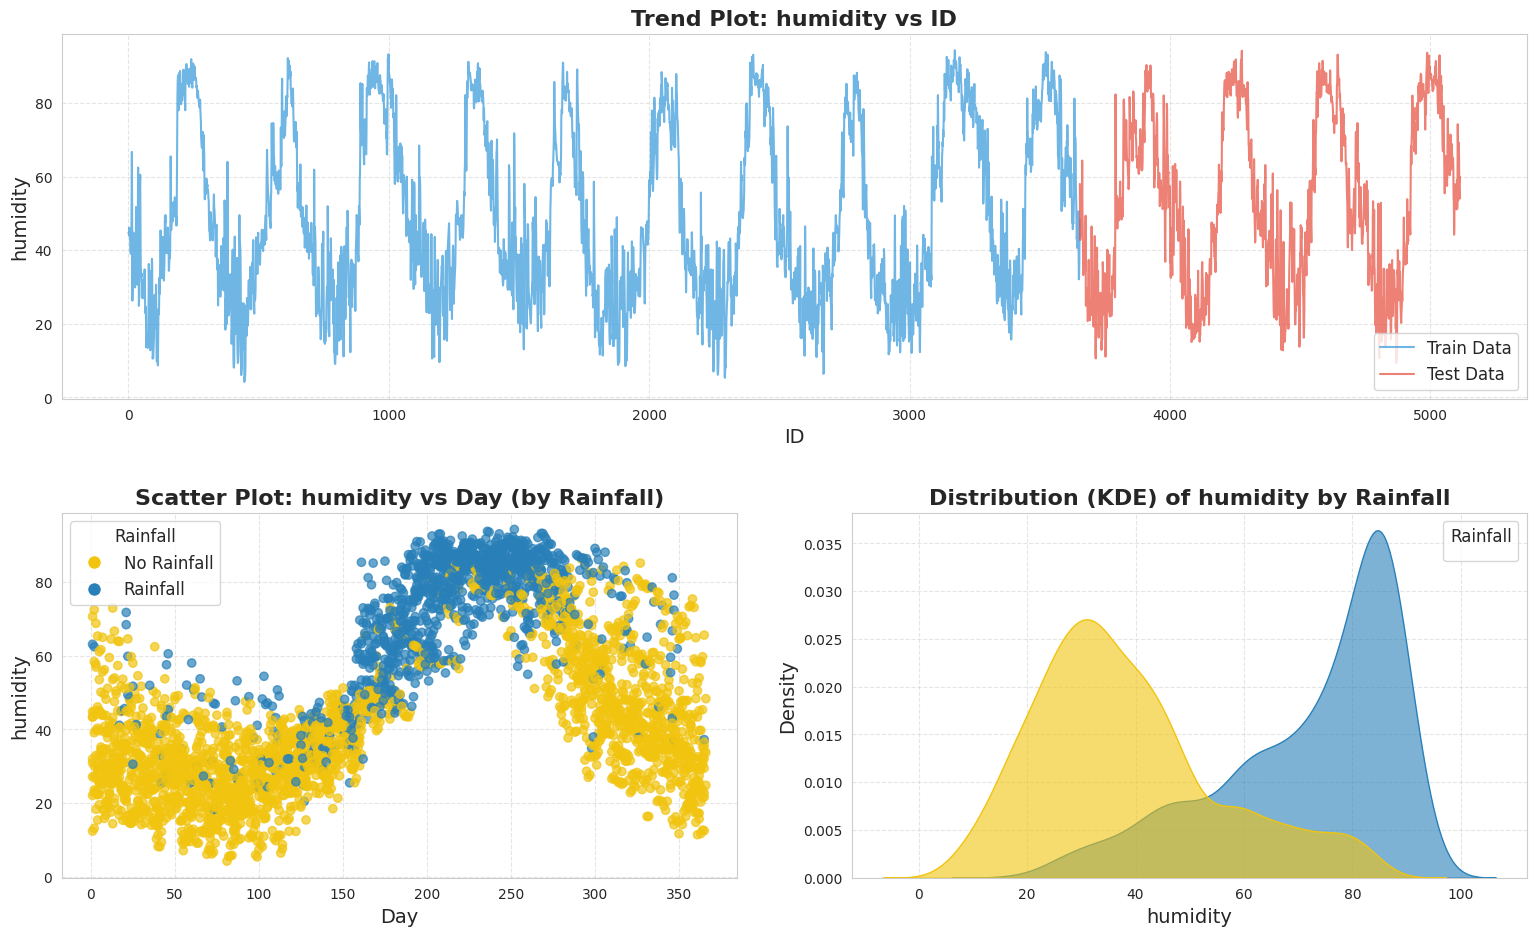

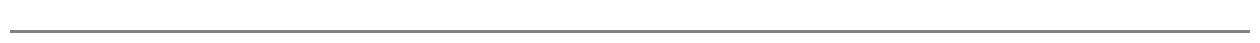

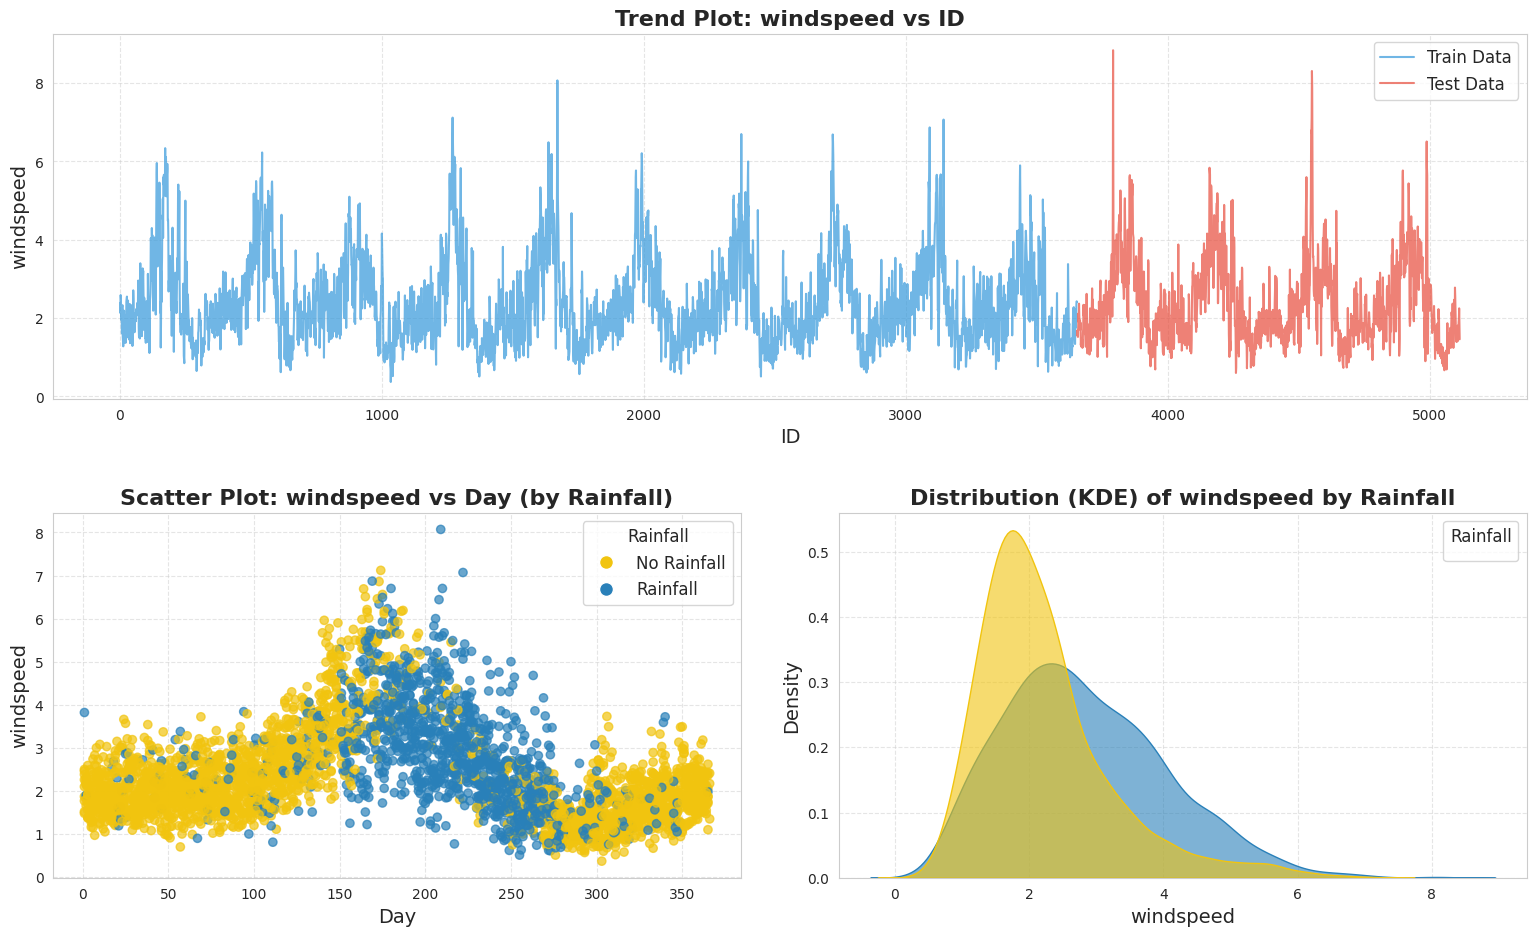

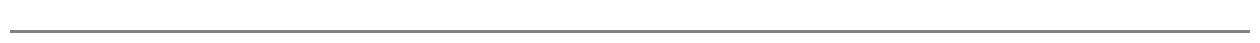

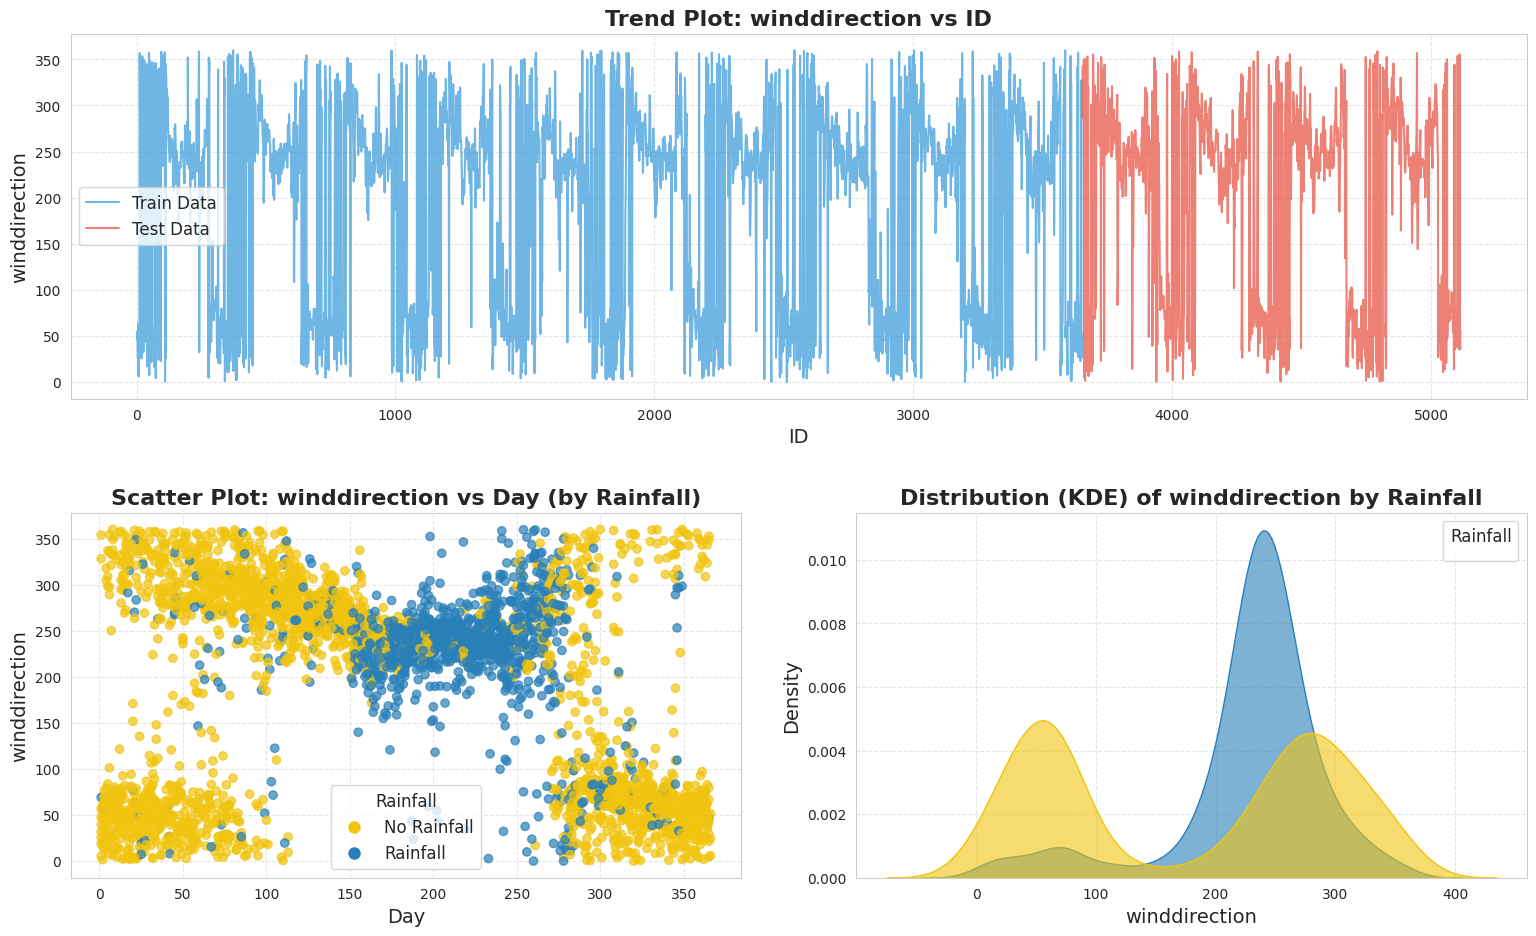

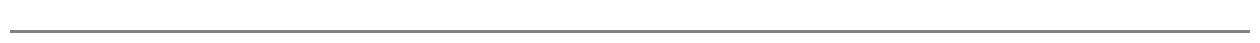

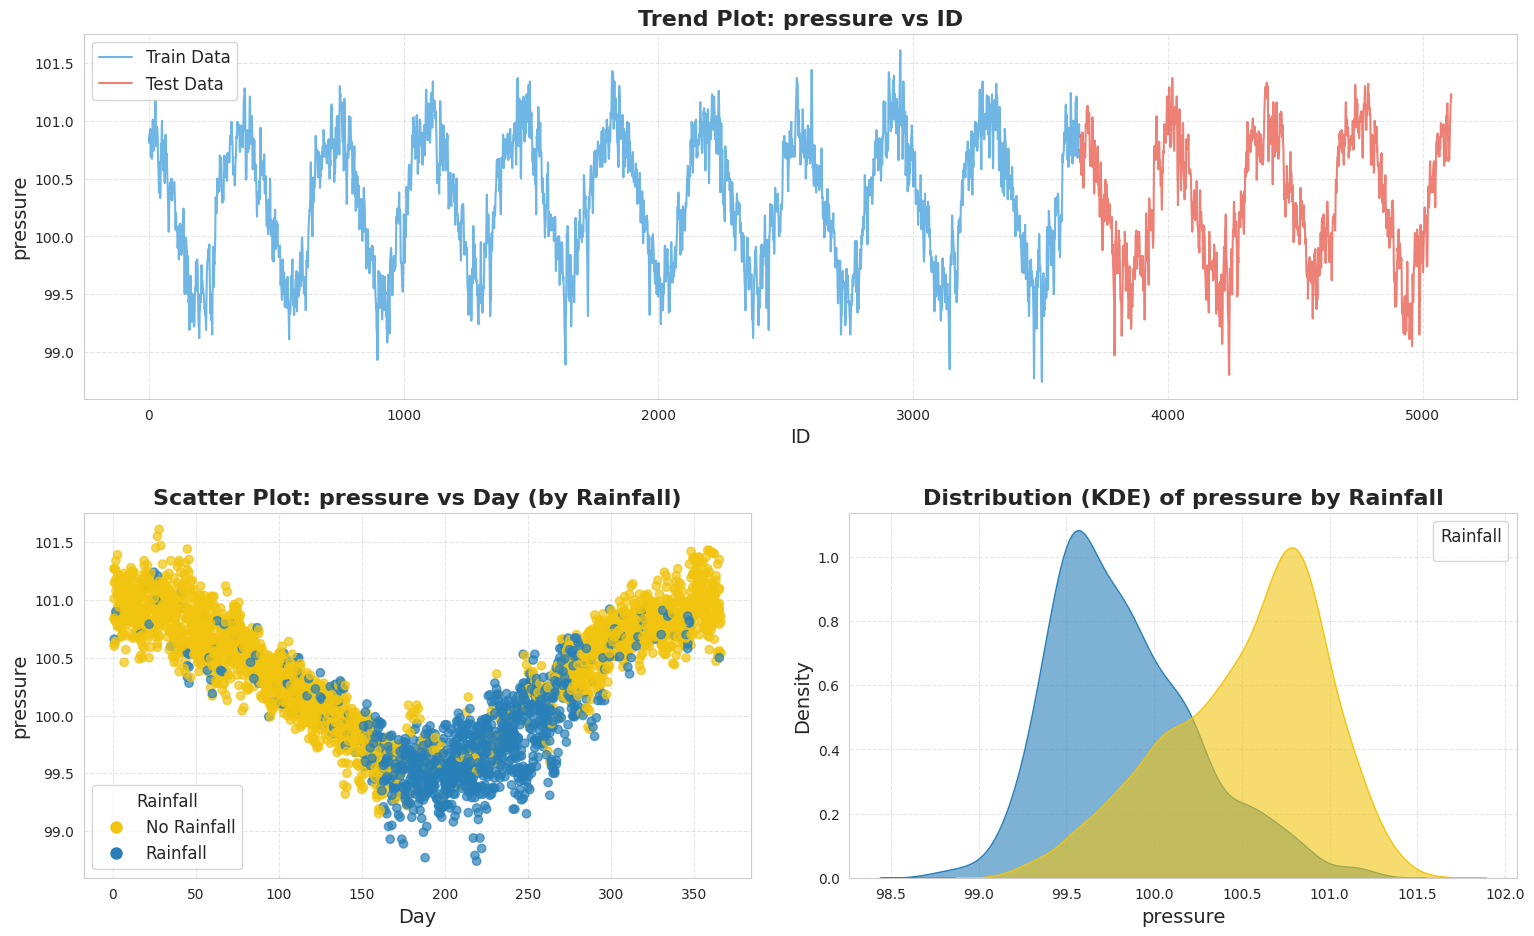

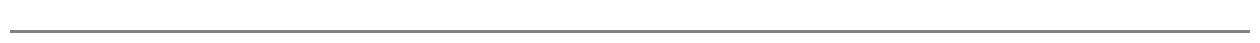

In [15]:
# Numerical columns to plot
numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in ['id', 'day_of_year', 'rain(yes/no)']:
    if col in numerical_columns:
        numerical_columns.remove(col)

# Plotting loop for each numerical variable
for column in numerical_columns:
    # Create figure with specific layout
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

    # ---- Trend Plot (ID vs Variable) ----
    ax0 = fig.add_subplot(gs[0, :])
    ax0.plot(train_data['id'], train_data[column], linestyle='-', color=train_color, label='Train Data', alpha=0.7)
    ax0.plot(test_data['id'], test_data[column], linestyle='-', color=test_color, label='Test Data', alpha=0.7)

    ax0.set_xlabel('ID', fontsize=14)
    ax0.set_ylabel(column, fontsize=14)
    ax0.set_title(f'Trend Plot: {column} vs ID', fontsize=16, fontweight='bold')  # ✅ Fix applied
    ax0.legend(fontsize=12)
    ax0.grid(True, linestyle='--', alpha=0.5)

    

    # ---- Scatter Plot (Day vs Variable) ----
    ax1 = fig.add_subplot(gs[1, 0])
    scatter = ax1.scatter(
        train_data['day_of_year'], train_data[column],
        c=train_data['rain(yes/no)'].map(rainfall_colors), alpha=0.7
    )
    ax1.set_xlabel('Day', fontsize=14)
    ax1.set_ylabel(column, fontsize=14)
    ax1.set_title(f'Scatter Plot: {column} vs Day (by Rainfall)', fontsize=16, fontweight='bold')  # ✅ Fix applied

    # Custom legend for rainfall
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='No Rainfall',
               markersize=10, markerfacecolor=rainfall_colors[0]),
        Line2D([0], [0], marker='o', color='w', label='Rainfall',
               markersize=10, markerfacecolor=rainfall_colors[1])
    ]
    ax1.legend(handles=legend_elements, title="Rainfall", fontsize=12, title_fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.5)

    

    # ---- KDE Plot (Variable distribution by Rainfall) ----
    ax2 = fig.add_subplot(gs[1, 1])
    sns.kdeplot(data=train_data, x=column, hue='rain(yes/no)', palette=rainfall_colors, ax=ax2, fill=True, common_norm=False, alpha=0.6)

    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel('Density', fontsize=14)
    ax2.set_title(f'Distribution (KDE) of {column} by Rainfall', fontsize=16, fontweight='bold')  
    ax2.legend(title='Rainfall', fontsize=12, title_fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.5)

    
    
    # Adjust layout spacing
    plt.tight_layout(pad=3.0)
    plt.show()

    # ---- Add clear separation after each variable ----
    plt.figure(figsize=(16, 0.3))  # Adjust spacing
    plt.axhline(y=0, color='gray', linewidth=5, linestyle='-') 
    plt.axis('off')
    plt.show()

# <span style="color:#ffffff; font-size: 1%;">[4] 🛠️ Data Preprocessing</span>
### <span style="color:#ffffff; font-size: 1%;">Data Preprocessing</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[4] 🛠️🧹 Data Preprocessing</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.1] Data Imputation (Handling missing values) </span></b>

we have chose a dataset with no missing values, so we can focus on other important things

In [16]:
df.isna().sum().to_frame().T

id  day  PRECTOTCORR  temperature  maxtemp  mintemp  humidity  windspeed  \
0   0    0            0            0        0        0         0          0   

   winddirection  pressure  rain_category  rain(yes/no)  date  
0              0         0              0             0     0

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.2] Feature Engineering </span></b>

Think of **feature extraction** like brewing the perfect cup of coffee. ☕ You start with raw beans (data), but instead of using them as they are, you **grind, filter, and extract** the rich flavors (key information) to create something **far more useful**.  

In **Machine Learning**, raw data often contains **noise, redundancy, or irrelevant details**. Feature extraction helps by **deriving new, more meaningful features** that enhance model performance.  

---

#### 📌 **Why Feature Extraction Matters?**  
✅ **Enhances patterns & relationships** → Helps models capture hidden trends.  
✅ **Removes noise & redundancy** → Keeps only what truly matters.  
✅ **Improves accuracy & efficiency** → Optimized data leads to better predictions.  
✅ **Reduces dimensionality** → Fewer features = Faster computation!  

In [17]:
# Define function to categorize wind direction into sectors 
def wind_sector(direction):
    if pd.isna(direction):
        return np.nan  # Preserve missing values for later handling
    direction = float(direction)
    if direction >= 315 or direction < 45:
        return 'North'
    elif direction >= 45 and direction < 135:
        return 'East'
    elif direction >= 135 and direction < 225:
        return 'South'
    else:
        return 'West'


In [18]:
def perform_feature_engineering(df):
    """
    Applies feature engineering to the dataframe, creating new features for weather prediction.
    """

    # 1. Seasonal Features using 'day' (cyclical representation of the year)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)


    # 2. Lagged Features (previous day's values for key predictors)
    #    Shift by 1, then fill any remaining NaNs with 0 (or a median if desired)
    
    df['mintemp1'] = df['mintemp'].shift(1).fillna(0)
    df['humidity_lag1'] = df['humidity'].shift(1).fillna(0)

    # 3. Rolling Statistics (3-day trends for key predictors)
    #    Use rolling(window=3, min_periods=1) so the first 1-2 rows won't be NaN. Backfill if needed.

    df['mintemp_roll3_mean'] = df['mintemp'].rolling(window=3, min_periods=1).mean().fillna(method='bfill')
    df['humidity_roll3_mean'] = df['humidity'].rolling(window=3, min_periods=1).mean().fillna(method='bfill')

    # 4. Interaction Features (combinations of highly correlated features)
    df['pressure_humidity'] = (df['pressure'] * df['humidity']).fillna(0)  # Replace missing with 0

    # 5. Meteorological Features
    #    Compute temperature range and pressure difference
    df['temp_range'] = (df['maxtemp'] - df['mintemp']).fillna(df['maxtemp'].median())
    df['pressure_diff'] = df['pressure'].diff().fillna(0)

    # 6. Additional Time-Based Interactions with 'day'
    
    df['mintemp_day_cos'] = (df['mintemp'] * df['day_cos']).fillna(0)
    df['humidity_roll3_day_sin'] = (df['humidity_roll3_mean'] * df['day_sin']).fillna(0)

    # 7. Categorical Feature: Wind Direction
    #    Map wind direction to bins and replace missing with 'Unknown'
    df['wind_sector'] = df['winddirection'].apply(wind_sector).fillna('Unknown')


    return df

In [19]:
# Apply Feature Engineering to Combined Train & Test Data
# ----------------------
id_test = test_data['id']

# Concatenate train & test, apply transformations, then split back
full_data = pd.concat([train_data, test_data], axis=0).sort_values('id')
full_data = perform_feature_engineering(full_data)

# Split back into train & test
train_data = full_data[full_data['rain(yes/no)'].notna()]
test_data = full_data[full_data['rain(yes/no)'].isna()]


In [20]:
# List of Newly Created Features
# ----------------------
newly_created_vars = [
    # 1. Cyclical Seasonal Features
    'day_sin', 'day_cos',
    
    # 2. Lagged Features
    'mintemp1', 'humidity_lag1',
    
    # 3. Rolling Statistics
    'mintemp_roll3_mean', 'humidity_roll3_mean',
    
    # 4. Interaction Features
    'pressure_humidity',
    
    # 5. Meteorological Features
    'temp_range', 'pressure_diff',
    
    # 6. Time-Based Interactions
    'mintemp_day_cos', 'humidity_roll3_day_sin',
    
    
    
]

# Categorical Features
categorical_new_feats = ['wind_sector']

#### 📌 **Feature Selection: Keeping the Gold, Dropping the Rest**  

Just like a **chef crafting a gourmet dish**, we’ve added a **rich variety of features** to enhance our model’s ability to detect patterns. 🍽️ But not all ingredients (features) add value—some are redundant, noisy, or contribute little to predictions.  

🔍 **Why is Feature Selection Important?**  
✅ **Prevents Overfitting** → Too many features can make the model overly complex.  
✅ **Boosts Performance** → Keeps only the most relevant, high-impact features.  
✅ **Speeds Up Training** → Fewer features = faster computation = better efficiency.  
✅ **Improves Interpretability** → Easier to understand what drives predictions.  

Now, we'll apply **Recursive Feature Elimination (RFE)** to identify the **most valuable features** while removing those that add **little to no predictive power**. After that, we'll **visualize feature correlations** and **drop weak or redundant features** to refine our dataset further. 📊🔥

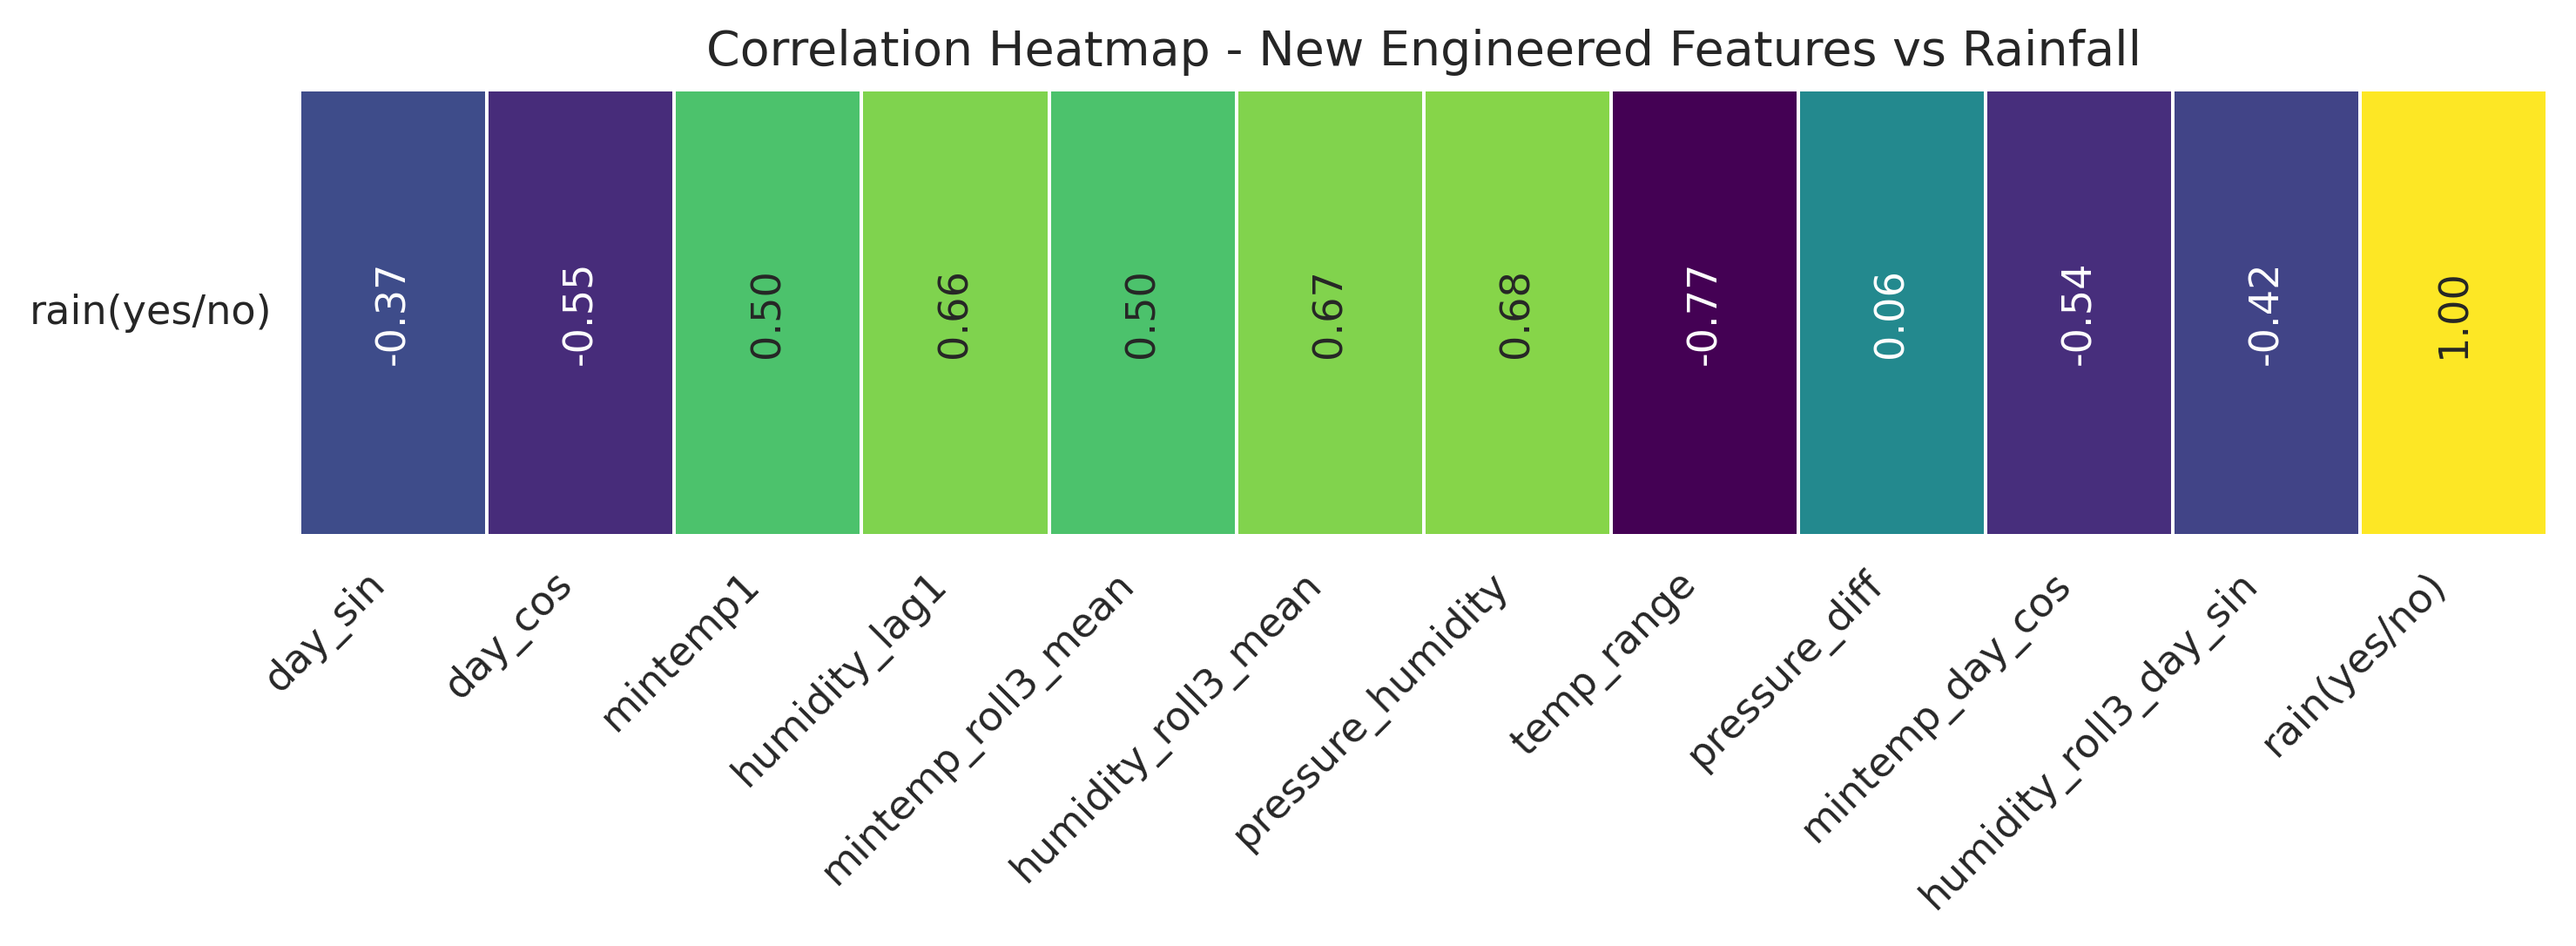

In [21]:
# Compute correlation matrix only for newly created features
corr_train = train_data[newly_created_vars + ['rain(yes/no)']].corr()[['rain(yes/no)']]

# Heatmap visualization without color bar, displaying values vertically
plt.figure(figsize=(10, 2),dpi=333)
ax = sns.heatmap(
    corr_train.T,  # Transposing so features are on x-axis
    annot=True, 
    cmap='viridis', 
    linewidths=0.5, 
    cbar=False, 
    fmt=".2f", 
    annot_kws={"rotation": 90}  # Rotate annotations to be vertical
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Correlation Heatmap - New Engineered Features vs Rainfall')
plt.show()

Top 15 important features from Random Forest:
Index(['temp_range', 'humidity', 'mintemp', 'pressure_humidity',
       'humidity_lag1', 'mintemp_roll3_mean', 'mintemp1',
       'humidity_roll3_mean', 'pressure', 'maxtemp', 'mintemp_day_cos',
       'day_cos', 'humidity_roll3_day_sin', 'day_sin', 'windspeed'],
      dtype='object')


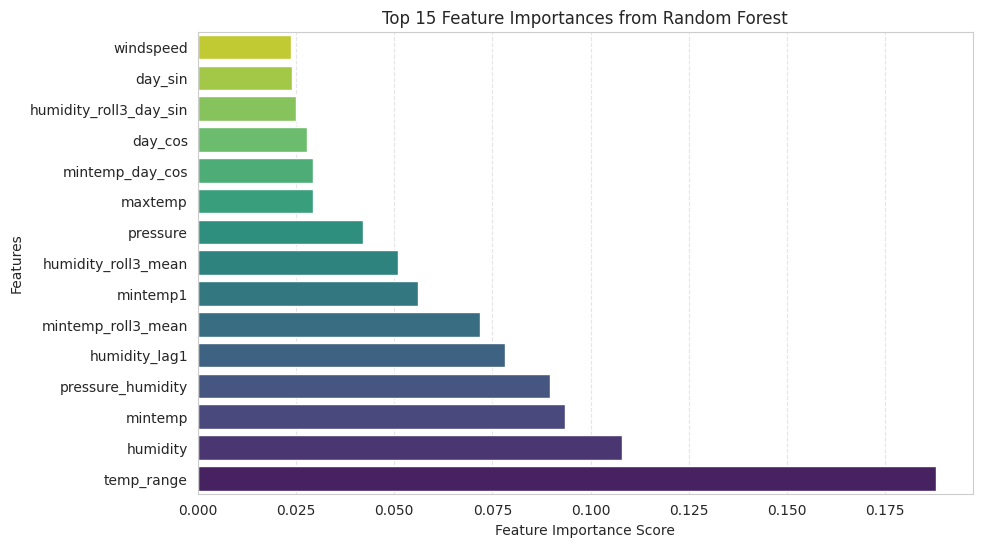

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Columns to encode
columns_to_encode = ['wind_sector']

# Perform one-hot encoding with prefix
encoded_data1 = pd.get_dummies(train_data[columns_to_encode], prefix=columns_to_encode)
encoded_data2 = pd.get_dummies(test_data[columns_to_encode], prefix=columns_to_encode)


# Ensure there are no duplicate column names before joining
train_data = train_data.drop(columns=columns_to_encode, errors="ignore")  # Drop original before merging
train_data = train_data.join(encoded_data1)


test_data = test_data.drop(columns=columns_to_encode, errors="ignore")  # Drop original before merging
test_data = test_data.join(encoded_data2)


# Prepare feature matrix X and target variable y
X = train_data.select_dtypes(include=['float64', 'int64']).drop(columns=['PRECTOTCORR','rain(yes/no)','rain_category', 'id'], errors='ignore').copy()
y = train_data["rain(yes/no)"].copy()

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X, y)

# Get feature importances 
feature_importances = rf.feature_importances_
important_features = np.argsort(feature_importances)[::-1][:15]

# Get selected feature names and importance scores
selected_features = X.columns[important_features]
selected_importance = feature_importances[important_features]

print(f"Top {len(selected_features)} important features from Random Forest:")
print(selected_features)

# -------------------------------
# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_importance, y=selected_features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 15 Feature Importances from Random Forest")
plt.gca().invert_yaxis()  # Flip so the most important is at the top
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()

In [23]:
# Compute correlation matrix
corr_matrix = X[selected_features].corr().abs()

# Create a mask to filter highly correlated features 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_correlation = [column for column in upper.columns if any(upper[column] > 0.80)]

# Remove highly correlated features
final_features = [f for f in selected_features if f not in high_correlation]

# Display final selected features
print(f"Final Selected Features After Correlation Filtering: {final_features}")



Final Selected Features After Correlation Filtering: ['temp_range', 'mintemp', 'maxtemp', 'humidity_roll3_day_sin', 'windspeed']


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Simple, fast model for RFE

# Step 1: Prepare Data
X = train_data.drop(columns=['PRECTOTCORR','rain(yes/no)','rain_category'], errors='ignore')  # Feature set
y = train_data['rain(yes/no)']  # Target variable

# Step 2: Initialize RFE with Linear Regression as the estimator
n_features_to_select = 10  # Choose the number of top features to retain
estimator = LinearRegression()  # You can use other models like RandomForestRegressor

rfe = RFE(estimator, n_features_to_select=n_features_to_select)

# Step 3: Fit RFE to select the best features
rfe.fit(X, y)

# Step 4: Extract selected feature names
selected_rfe_features = X.columns[rfe.support_].tolist()

print("Selected Features using RFE:")
print(selected_rfe_features)

Selected Features using RFE:
['temperature', 'mintemp', 'windspeed', 'pressure', 'day_sin', 'temp_range', 'pressure_diff', 'wind_sector_North', 'wind_sector_South', 'wind_sector_West']


In [25]:
# Drop columns from both train and test data
#selected_features = final_features 
selected_features = selected_rfe_features

train_data = train_data[selected_features + ['rain(yes/no)']]
test_data = test_data[selected_features]

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.3] Outlier Detection </span></b>

In [26]:
# Quick IQR-based outlier detection
columns_to_check = train_data.select_dtypes(include=['float64', 'int64']).columns
columns_to_check = [col for col in columns_to_check if col not in ['rain(yes/no)', 'id']]

outlier_summary = {}

for col in columns_to_check:
    Q1 = train_data[col].quantile(0.05)
    Q3 = train_data[col].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = train_data[(train_data[col] < lower) | (train_data[col] > upper)]
    count = outliers.shape[0]
    
    if count > 0:
        outlier_summary[col] = count

outlier_summary

{}

*No outliears Found*

In [27]:
y = train_data['rain(yes/no)']

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [4.4] Feature Scaling </span></b>


#### 📌 Why Feature Scaling Matters?
- **Avoids numerical dominance**—ensures no feature overpowers others just because of its scale.
- **Speeds up optimization**—gradient-based models (like Neural Networks, Logistic Regression) converge **faster**. ⏩  
- **Boosts performance**—distance-based models (KNN, SVM) rely on properly scaled data for accurate comparisons. 🎯  
- **Improves stability**—helps prevent models from making erratic updates during training.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Dropping selected columns for scaling
if all(col in train_data.columns for col in columns_to_encode):
    train_data_to_scale = train_data.drop(columns_to_encode, axis=1)
    test_data_to_scale = test_data.drop(columns_to_encode, axis=1)

else:
    train_data_to_scale = train_data
    test_data_to_scale = test_data

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the training data
minmax_scaler.fit(train_data_to_scale.drop(['rain(yes/no)'], axis=1))

# Scale the training data
scaled_data_train = minmax_scaler.transform(train_data_to_scale.drop(['rain(yes/no)'], axis=1))
scaled_train_df = pd.DataFrame(scaled_data_train, columns=train_data_to_scale.drop(['rain(yes/no)'], axis=1).columns)

# Scale the test data using the parameters from the training data
scaled_data_test = minmax_scaler.transform(test_data_to_scale)
scaled_test_df = pd.DataFrame(scaled_data_test, columns=test_data_to_scale.columns)

In [29]:
display(scaled_train_df.sample(3))
display(scaled_test_df.sample(3))

temperature   mintemp  windspeed  pressure   day_sin  temp_range  \
2675     0.837099  0.725843   0.428571  0.442509  0.944033    0.840507   
2736     0.734839  0.873408   0.549351  0.240418  0.521511    0.337109   
923      0.546968  0.765543   0.320779  0.240418  0.410116    0.100136   

      pressure_diff  wind_sector_North  wind_sector_South  wind_sector_West  
2675       0.297030                0.0                0.0               1.0  
2736       0.524752                0.0                1.0               0.0  
923        0.465347                0.0                0.0               1.0

temperature   mintemp  windspeed  pressure   day_sin  temp_range  \
743      0.095521  0.123596   0.212987  0.804878  0.619337    0.700498   
1383     0.535077  0.704869   0.122078  0.616725  0.017126    0.253738   
774      0.390408  0.293258   0.163636  0.783972  0.849732    0.931581   

      pressure_diff  wind_sector_North  wind_sector_South  wind_sector_West  
743        0.613861                1.0                0.0               0.0  
1383       0.425743                0.0                0.0               0.0  
774        0.247525                0.0                0.0               0.0

In [30]:
train_data_combined = scaled_train_df

test_data_combined = scaled_test_df

# <span style="color:#ffffff; font-size: 1%;">[5] 🏗️ Modelling & Evaluation</span>
### <span style="color:#ffffff; font-size: 1%;">Modelling</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[5] 🏗️📊 Modelling & Evaluation</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://images.theconversation.com/files/436774/original/file-20211209-172173-1watr8u.jpg?ixlib=rb-4.1.0&rect=7%2C29%2C4881%2C3224&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

Now that our data is cleaned and prepped, it's time to build and evaluate models! 🚀 In this section, we’ll experiment with different algorithms, fine-tune parameters, and explore blending techniques to improve performance.

Since modeling is an iterative process, we’ll continuously refine our approach—tweaking hyperparameters, testing ensemble methods, and analyzing results—to squeeze out the best predictions possible! 🔄📊

In [31]:
# Define Stratified K-Fold Cross-Validation
def stratified_cross_validation(X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    for train_idx, val_idx in skf.split(X, y):
        yield X.iloc[train_idx], X.iloc[val_idx], y.iloc[train_idx], y.iloc[val_idx]

#### 📌 **What's Going On?**  

- **Stratified K-Fold Cross-Validation** → Ensures that each fold maintains the **same class distribution** as the full dataset, which is crucial for handling **imbalanced classification problems**.  
- **Prevents Data Leakage** → Since **shuffling is enabled (`shuffle=True`)**, but applied within each fold, the method **preserves class proportions** without leaking information from future data points into the training set.  
- **Ensures Model Generalization** → Helps in **robust evaluation** by testing the model on multiple subsets while ensuring **fair representation of the target variable** across all splits.  

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [5.1] Model Training & Validation Predictions </span></b>

In [32]:
# Define Logistic Regression Model with Cross-Validation for Hyperparameter Tuning
log_reg_model = LogisticRegressionCV(
    cv=5,  # Cross-validation folds within training data
    penalty='l2',  # Ridge Regularization
    solver='liblinear',  # Good for small to medium datasets
    class_weight='balanced',  # Handles class imbalance
    random_state=42
)

In [33]:
# Evaluate model with Stratified K-Fold Cross-Validation
print(f"Training Logistic Regression with Stratified K-Fold Cross-Validation...")

X = train_data_combined.copy()

auc_scores = []
fold = 1
for X_train, X_val, y_train, y_val in stratified_cross_validation(X, y, n_splits=5):
    log_reg_model.fit(X_train, y_train)
    y_val_proba = log_reg_model.predict_proba(X_val)[:, 1]
    y_val_pred = (y_val_proba >= 0.5).astype(int)
    
    # Compute ROC-AUC
    fold_auc = roc_auc_score(y_val, y_val_proba)
    
    # Print metrics
    print(f"Fold {fold} - ROC-AUC: {fold_auc:.4f}")
    print(classification_report(y_val, y_val_pred))
    print("-" * 40)
    
    auc_scores.append(fold_auc)
    fold += 1

# Compute and print the average AUC score
avg_auc = np.mean(auc_scores)
print(f"Average ROC-AUC for Logistic Regression: {avg_auc:.4f}\n")

Training Logistic Regression with Stratified K-Fold Cross-Validation...
Fold 1 - ROC-AUC: 0.9675
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       494
         1.0       0.82      0.91      0.86       237

    accuracy                           0.91       731
   macro avg       0.89      0.91      0.90       731
weighted avg       0.91      0.91      0.91       731

----------------------------------------
Fold 2 - ROC-AUC: 0.9596
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       493
         1.0       0.81      0.89      0.85       238

    accuracy                           0.90       731
   macro avg       0.88      0.90      0.88       731
weighted avg       0.90      0.90      0.90       731

----------------------------------------
Fold 3 - ROC-AUC: 0.9584
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91       493
        

In [34]:
# Final training on the full dataset
print("Training Logistic Regression on the full dataset...")
log_reg_model.fit(X, y)

# Generate probability predictions on the test set
test_proba = log_reg_model.predict_proba(test_data_combined)[:, 1]

Training Logistic Regression on the full dataset...


---

#### 📌 **What's Going On?**  

- **Evaluating with ROC-AUC** → The model is trained on multiple folds, and **ROC-AUC scores** are computed to measure classification performance.  
- **Thresholding for Predictions** → Probability scores are converted into binary predictions using a **0.5 threshold** for evaluation.  
- **Performance Tracking** → ROC-AUC scores are stored for each fold, and the final **average AUC** is calculated to assess model stability. 

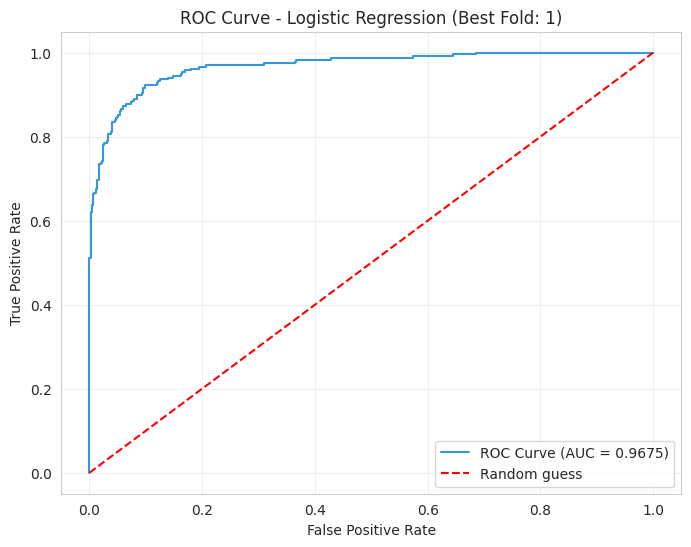

In [35]:
# Find the best fold based on the highest ROC-AUC score
best_fold_index = np.argmax(auc_scores)  # Get index of best ROC-AUC score
best_fold_data = list(stratified_cross_validation(X, y, n_splits=5))[best_fold_index]

X_train_best, X_val_best, y_train_best, y_val_best = best_fold_data
log_reg_model.fit(X_train_best, y_train_best)
y_val_proba_best = log_reg_model.predict_proba(X_val_best)[:, 1]

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_val_best, y_val_proba_best)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#3498db", label=f"ROC Curve (AUC = {auc_scores[best_fold_index]:.4f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve - Logistic Regression (Best Fold: {best_fold_index + 1})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

---

#### 📌 **Understanding the ROC Curve**  
- The **ROC (Receiver Operating Characteristic) Curve** helps evaluate the performance of a classification model.  
- The **x-axis (False Positive Rate - FPR)** represents cases where the model incorrectly predicts the positive class.  
- The **y-axis (True Positive Rate - TPR)** represents cases where the model correctly predicts the positive class.  
- The **blue curve** shows how well the model differentiates between the two classes.  
- The **red diagonal line** represents a **random classifier** (pure guessing). A good model should have its ROC curve **above this line**, indicating better-than-random performance.  
- The **AUC (Area Under the Curve)** value quantifies model performance—closer to **1.0** indicates a strong classifier, while **0.5** suggests no discrimination ability.  

Test ROC-AUC Score: 0.9609
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       912
           1       0.84      0.91      0.87       549

    accuracy                           0.90      1461
   macro avg       0.89      0.90      0.89      1461
weighted avg       0.90      0.90      0.90      1461



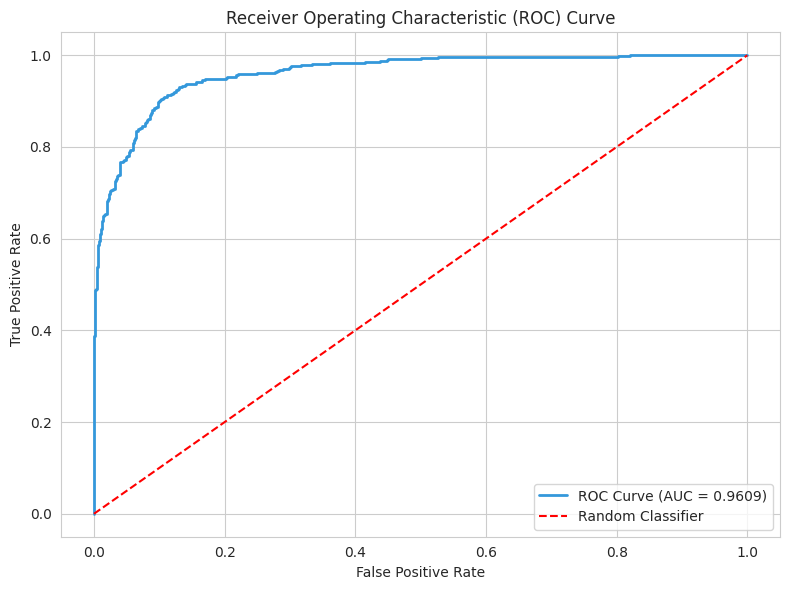

In [36]:
#id_test = test_data['id']
test_labels = df.loc[df['id'].isin(id_test), 'rain(yes/no)'].values

# ROC AUC score
test_auc = roc_auc_score(test_labels, test_proba)
print(f"Test ROC-AUC Score: {test_auc:.4f}")

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(test_labels, test_proba)

# Optional: threshold to convert probs to binary and show classification metrics
test_preds = (test_proba >= 0.5).astype(int)
print(classification_report(test_labels, test_preds))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_auc:.4f})', color="#3498db", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', color='red' ,label='Random Classifier')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Conclusion & Insights

The final model demonstrated **strong classification performance** in predicting rainfall (`rain(yes/no)`) using weather data from NASA's POWER API.

#### 🔍 Key Metrics:
- **ROC-AUC Score**: `0.9609` – Indicates excellent ability to distinguish between rainy and non-rainy days.
- **Accuracy**: `90%` – High overall correctness of predictions.
- **Precision (No Rain = 0)**: `0.94` – Model is highly reliable in identifying dry days.
- **Recall (Rain = 1)**: `0.91` – Most rainy days are successfully captured by the model.
- **F1-Score (Rain = 1)**: `0.87` – Balanced measure of rain detection accuracy.

#### 🧠 Insights:
- The model performs **consistently well across both classes**, showing no major imbalance-related issues.
- **Higher precision for dry days** and **strong recall for rainy days** suggests the model is both conservative in false alarms and effective in flagging rainfall events.
- This performance makes the model suitable for **real-world rainfall prediction tasks**, such as in agriculture, water resource planning, or early warning systems.

> ✅ The model is ready for deployment or further tuning based on temporal validation, seasonal trends, or integration with external systems.


In [37]:
# Save .csv files for presention (Dashboard)
# Create prediction file
test_pred = pd.DataFrame({
    'id': id_test,
    'rainfall': test_proba  # Predicted probabilities for rainfall
})

# Save to CSV
test_pred.to_csv("test_pred1.csv", index=False)
df.to_csv("DF1.csv", index=False)